In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


import xtrack as xt
import xcoll as xc
import xpart as xp


In [2]:
file = 'TCCP_impacts_double_channeling_1GeV_more_margin.h5'

In [3]:
dfpart = pd.read_hdf(file, key="TCCP_impacts")

In [4]:
dfpart

,particle_id,x,y,px,py
0,0,-0.000365,0.013001,0.000009,0.000156
1,1,-0.000968,0.012875,0.000010,0.000155
2,2,-0.000027,0.011851,0.000009,0.000141
3,3,0.000265,0.011286,-0.000004,0.000133
7,5,-0.000261,0.013395,0.000007,0.000162
...,...,...,...,...,...
51461,19949995,-0.000425,0.013488,0.000012,0.000163
51462,19949996,-0.000096,0.013099,-0.000005,0.000158
51463,19949997,-0.000045,0.014342,0.000008,0.000175
51464,19949998,0.000469,0.013206,-0.000015,0.000159


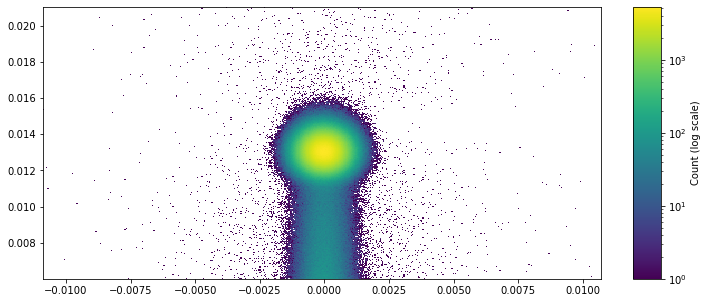

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
h =ax.hist2d(dfpart['x'], dfpart['y'], bins=500,  norm=matplotlib.colors.LogNorm(),)

axins_params = ["100%", "5%", "right", -6]
axins = inset_axes(ax, height=axins_params[0],  width=axins_params[1], loc=axins_params[2], borderpad=axins_params[3] )
fig.colorbar(h[3], cax=axins, orientation='vertical', label='Count (log scale)')

In [6]:
align_angle = 0.000156184
jaw_U = 0.012047852327048454
length = 0.070
width = 2.0e-3
height = 8.0e-3
coll = xc.EverestCrystal(length= 0.070, material=xc.materials.SiliconCrystal, bending_radius=10, active = True, side = 'left',
                            width= 2.0e-3,  height = 8.0e-3, lattice='strip', angle = 90,
                            tilt =  align_angle, jaw= 0.012047852327048454)

In [7]:
#line = xt.Line(elements = {'TCCP': coll, 'drift': xt.Drift(length = 1)}, element_names = ['TCCP', 'drift'])

In [8]:
num_part = len(dfpart)
#impacts = xc.InteractionRecord.start(line= line) 
part = xp.Particles(x=dfpart.x, px=dfpart.px, y=dfpart.y, py=dfpart.py, delta=0, p0c=1e12)
coll.track(part)
#line.build_tracker()
#xc.enable_scattering(line)
#line.track(part)
#xc.disable_scattering(line)

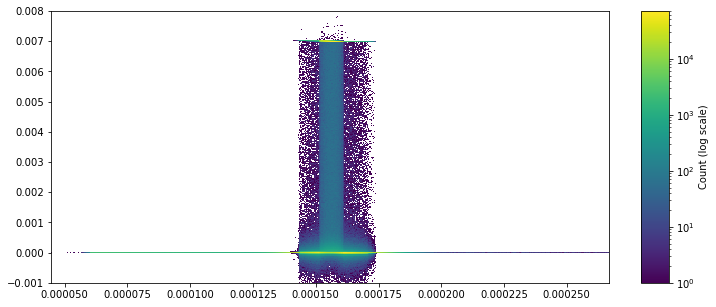

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
mask =  (part.state > 0 ) #& ( dfpart.py  < 190.e-6) & ( dfpart.py > 125.e-6)
h = ax.hist2d(dfpart.py[mask] , part.py[mask] - dfpart.py[mask], bins=500,  norm=matplotlib.colors.LogNorm(),)
ax.set_ylim(-1e-3, 8e-3)
axins_params = ["100%", "5%", "right", -6]
axins = inset_axes(ax, height=axins_params[0],  width=axins_params[1], loc=axins_params[2], borderpad=axins_params[3] )
fig.colorbar(h[3], cax=axins, orientation='vertical', label='Count (log scale)')


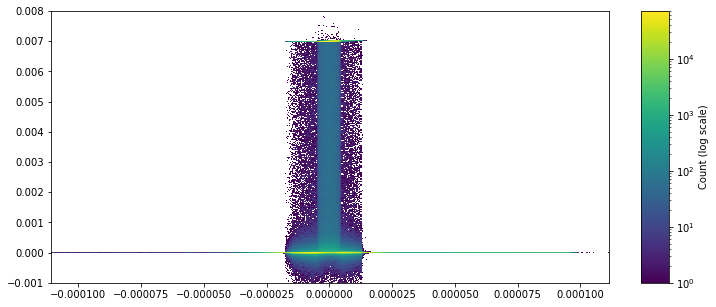

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
mask =  (part.state > 0 ) #& ( dfpart.py  < 190.e-6) & ( dfpart.py > 125.e-6)
h = ax.hist2d(align_angle - dfpart.py[mask] , part.py[mask] - dfpart.py[mask], bins=500,  norm=matplotlib.colors.LogNorm(),)
ax.set_ylim(-1e-3, 8e-3)
axins_params = ["100%", "5%", "right", -6]
axins = inset_axes(ax, height=axins_params[0],  width=axins_params[1], loc=axins_params[2], borderpad=axins_params[3] )
fig.colorbar(h[3], cax=axins, orientation='vertical', label='Count (log scale)')

In [11]:
file2 = '/home/cmaccani/Downloads/AllInteractions.dat'

In [12]:
data2 = pd.read_csv(file2, delim_whitespace=True)
#data2.columns = ['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10', 'Col11', 'Col12', 'Col13', 'Col14', 'Col15']
data2.columns = ['NCASE', 'JTRACK', 'XCRY0', 'YCRY0', 'ZCRY0','TXCRY0', 'TYCRY0', 'TZCRY0', 'AATXIN', 'AXKICK', 'PTOT', '(EINIT-ETRACK)', 'KCHNNL', 'ISTATE', 'ICHPOT']


In [13]:
data2

,NCASE,JTRACK,XCRY0,YCRY0,ZCRY0,TXCRY0,TYCRY0,TZCRY0,AATXIN,AXKICK,PTOT,(EINIT-ETRACK),KCHNNL,ISTATE,ICHPOT
0,2,1,-0.096758,1.287522,-0.000226,0.000010,0.000155,1.0,-0.000010,-4.231708e-06,1000.9092,0.028586,0,5,0
1,6,1,-0.042664,1.331013,-0.000344,0.000011,0.000161,1.0,-0.000011,-1.813403e-05,1000.9125,0.025296,0,5,0
2,8,1,0.072028,1.242922,-0.000104,-0.000018,0.000149,1.0,0.000018,1.613688e-05,1000.9137,0.024168,0,0,0
3,10,1,-0.013847,1.336137,-0.000358,0.000007,0.000161,1.0,-0.000007,2.436412e-06,1000.9068,0.031043,0,5,0
4,11,1,0.042638,1.256512,-0.000141,-0.000024,0.000150,1.0,0.000024,-3.984162e-06,1000.9082,0.029655,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6315526,4992,1,-0.077475,1.273693,-0.000188,0.000015,0.000153,1.0,-0.000015,-5.257302e-07,1000.9112,0.026608,0,5,0
6315527,4994,1,0.076910,1.318094,-0.000309,-0.000012,0.000159,1.0,0.000012,1.546159e-06,1000.9060,0.031861,0,0,0
6315528,4996,1,-0.060664,1.296228,-0.000249,0.000015,0.000156,1.0,-0.000015,-1.820353e-05,1000.9066,0.031266,0,5,0
6315529,4998,1,0.054278,1.351339,-0.000399,-0.000018,0.000163,1.0,0.000018,-1.963651e-06,1000.9033,0.034506,0,0,0


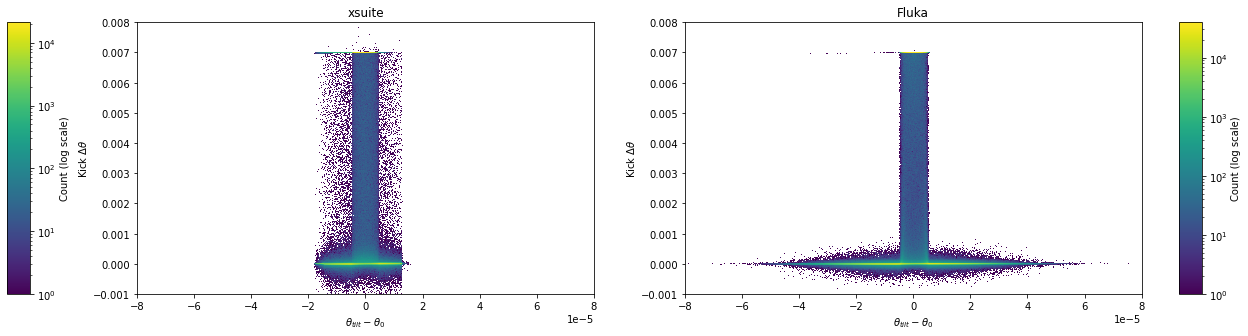

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

mask =  (part.state > 0 ) & ( dfpart.py  < 190.e-6) & ( dfpart.py > 125.e-6)
h1 = ax[0].hist2d(align_angle - dfpart.py[mask] , part.py[mask] - dfpart.py[mask], bins=500,  norm=matplotlib.colors.LogNorm(),)
ax[0].set_ylim(-1e-3, 8e-3)
ax[0].set_xlim(-8e-5, 8e-5)
ax[0].set_title('xsuite')
ax[0].set_xlabel(r'$\theta_{tilt} - \theta_{0}$')
ax[0].set_ylabel(r'Kick $\Delta\theta$')
axins_params = ["100%", "5%", "right", -6]
axins = inset_axes(ax[0], height=axins_params[0],  width=axins_params[1], loc='center left', borderpad=-13)
fig.colorbar(h1[3], cax=axins, orientation='vertical', label='Count (log scale)')

#mask =  (part.state > 0 ) & ( dfpart.py  < 190.e-6) & ( dfpart.py > 125.e-6)
h2 = ax[1].hist2d(data2.AATXIN, data2.AXKICK, bins=500,  norm=matplotlib.colors.LogNorm(),)
ax[1].set_ylim(-1e-3, 8e-3)
ax[1].set_xlim(-8e-5, 8e-5)
ax[1].set_title('Fluka')
ax[1].set_xlabel(r'$\theta_{tilt} - \theta_{0}$')
ax[1].set_ylabel(r'Kick $\Delta\theta$')
axins = inset_axes(ax[1], height=axins_params[0],  width=axins_params[1], loc=axins_params[2], borderpad=axins_params[3] )
fig.colorbar(h2[3], cax=axins, orientation='vertical', label='Count (log scale)')

In [15]:
len(mask)

7989520

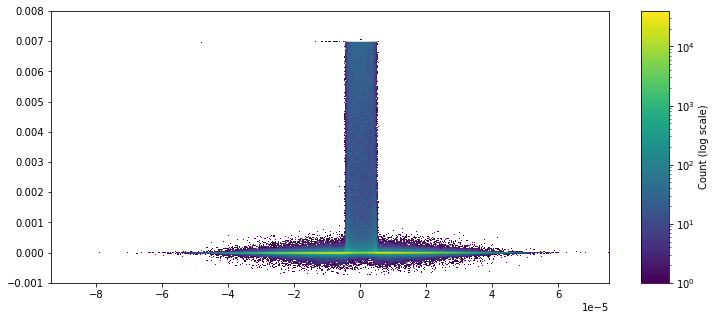

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
#mask =  (part.state > 0 ) & ( dfpart.py  < 190.e-6) & ( dfpart.py > 125.e-6)
h = ax.hist2d(data2.AATXIN, data2.AXKICK, bins=500,  norm=matplotlib.colors.LogNorm(),)
ax.set_ylim(-1e-3, 8e-3)
axins_params = ["100%", "5%", "right", -6]
axins = inset_axes(ax, height=axins_params[0],  width=axins_params[1], loc=axins_params[2], borderpad=axins_params[3] )
fig.colorbar(h[3], cax=axins, orientation='vertical', label='Count (log scale)')

In [17]:
len(data2)

6315531

In [18]:
len(dfpart)

7989520

In [19]:
len(dfpart) - len(data2)

1673989

In [20]:
data2.AATXIN

0         -0.000010
1         -0.000011
2          0.000018
3         -0.000007
4          0.000024
             ...   
6315526   -0.000015
6315527    0.000012
6315528   -0.000015
6315529    0.000018
6315530   -0.000012
Name: AATXIN, Length: 6315531, dtype: float64

In [21]:
new_py  = align_angle - dfpart.py

In [22]:
count = 0
for i in range(len(data2)):
    if data2.AATXIN[i]  in new_py:
        count += 1
count

0

In [23]:
count = 0
for i in range(len(data2)):
    if data2.TYCRY0[i]  in dfpart.py:
        count += 1
count

0

In [24]:
common_elements = set(-dfpart.py).intersection(set(data2.TYCRY0))

In [25]:
common_elements

set()

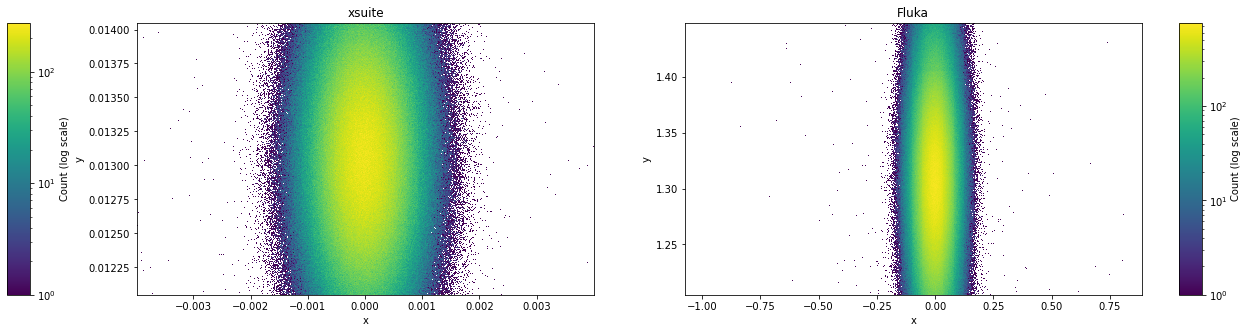

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

mask =  (part.state > 0 ) & ( dfpart.x  < height/2) & ( dfpart.x > - height/2) & ( dfpart.y  < jaw_U + width) & ( dfpart.y > jaw_U)
h1 = ax[0].hist2d(dfpart.x[mask] , dfpart.y[mask], bins=500,  norm=matplotlib.colors.LogNorm(),)
#ax[0].set_ylim(-1e-3, 8e-3)
#ax[0].set_xlim(-8e-5, 8e-5)
ax[0].set_title('xsuite')
ax[0].set_xlabel(r'x')
ax[0].set_ylabel(r'y')
axins_params = ["100%", "5%", "right", -6]
axins = inset_axes(ax[0], height=axins_params[0],  width=axins_params[1], loc='center left', borderpad=-13)
fig.colorbar(h1[3], cax=axins, orientation='vertical', label='Count (log scale)')

#mask =  (part.state > 0 ) & ( dfpart.py  < 190.e-6) & ( dfpart.py > 125.e-6)
h2 = ax[1].hist2d(data2.XCRY0, data2.YCRY0, bins=500,  norm=matplotlib.colors.LogNorm(),)
#ax[1].set_ylim(-1e-3, 8e-3)
#ax[1].set_xlim(-8e-5, 8e-5)
ax[1].set_title('Fluka')
ax[1].set_xlabel(r'x')
ax[1].set_ylabel(r'y')
axins = inset_axes(ax[1], height=axins_params[0],  width=axins_params[1], loc=axins_params[2], borderpad=axins_params[3] )
fig.colorbar(h2[3], cax=axins, orientation='vertical', label='Count (log scale)')

In [27]:
(max(dfpart.x[mask]) - min(dfpart.x[mask]))*1000

7.9828668385744095

In [28]:
(max(dfpart.y[mask]) - min(dfpart.y[mask]))*1000

1.9999993965029716

In [29]:
(max(data2.YCRY0) - min(data2.YCRY0))*10

2.435714000000002

In [30]:
(max(data2.XCRY0) - min(data2.XCRY0))*10

19.5910789

In [31]:
(max(dfpart.x) - min(dfpart.x))*1000

21.582188084721565

In [32]:
(max(dfpart.y) - min(dfpart.y))*1000

15.044778119772673

Some updates: @ has started try to do heavy simultions of TCCP with Fluka and it seems that we can achieve results in a reasonable way. We are now analisying the results from the channeling point of view comparing the same simulation performed with the different softwares that we have to assert that they make sense as a double check.

From the secondaries point of view she found out that in average for each proton more than ~10 secondary particles are created, increasing a lot the numerosty of the output. In fact, the size of the output file from the tracking of exactly these input particles, gives an output of ~20 GB of data. So we have two questions:
 - can you handle this amount of data or should we find a tradeoff?
 - did someone in the meantime find out a way to convert these data into the dd4hep format as .hepmc file? maybe @

A proposito, dopo che abbiamo discusso ci ho pensato ancora un po' riguardo all'osservazione che mi avevi riferito che aveva fatto Pascal, quella per cui, siccome conosciamo l'ellisse nello spazio delle fasi sappiamo che tutte le particelle che toccano il cristallo hanno un preciso angolo che e' dentro il range del critical angle, per cui tutte le particelle incidenti sono 'canalizzabili'. Pero sperimantalmente non c'e' modo di contarle e non possiamo sapere quante sono, possiamo contare solo quelle che hanno fatto channeling e 